# Climate Change data Analysis

In [1]:
# Import libraries

In [2]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import geopandas as gpd
import plotly.express as px
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Category10
import ipywidgets as widgets
from IPython.display import display
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import time
import folium
from folium import plugins
from matplotlib.animation import FuncAnimation

In [3]:
# Downlaod data from https://climatedata.imf.org/pages/climatechange-data

## Part1: Change in temperature

In [4]:
# The data set includes data about the Temperature change during the years 1961 - 2022 for different countries

In [5]:
# Load the data
df_temp = pd.read_csv('/Users/moni/DS - Karan/Week2/Data/Annual_Surface_Temperature_Change.csv')
df_temp

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,221,Western Sahara,EH,ESH,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.423,1.401,1.510,1.732,2.204,0.942,1.477,2.069,1.593,1.970
221,222,World,NaN,WLD,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.016,1.053,1.412,1.660,1.429,1.290,1.444,1.711,1.447,1.394
222,223,"Yemen, Rep. of",YE,YEM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,224,Zambia,ZM,ZMB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.790,0.917,1.450,1.401,0.105,0.648,0.855,0.891,0.822,0.686


In [6]:
# Delete unnecessary colums
df_temp=df_temp[['Country','ISO3', 'F1961', 'F1962',
       'F1963', 'F1964', 'F1965', 'F1966', 'F1967', 'F1968', 'F1969', 'F1970',
       'F1971', 'F1972', 'F1973', 'F1974', 'F1975', 'F1976', 'F1977', 'F1978',
       'F1979', 'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986',
       'F1987', 'F1988', 'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994',
       'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002',
       'F2003', 'F2004', 'F2005','F2006', 'F2007', 'F2008', 'F2009', 'F2010',
       'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018',
       'F2019', 'F2020', 'F2021', 'F2022']]
df_temp

,Country,ISO3,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,"Afghanistan, Islamic Rep. of",AFG,-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,Albania,ALB,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,Algeria,DZA,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,American Samoa,ASM,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,"Andorra, Principality of",AND,0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,Western Sahara,ESH,0.632,0.576,0.333,0.819,-0.337,0.284,-0.026,-0.368,...,1.423,1.401,1.510,1.732,2.204,0.942,1.477,2.069,1.593,1.970
221,World,WLD,0.211,0.038,0.168,-0.246,-0.223,0.201,-0.117,-0.126,...,1.016,1.053,1.412,1.660,1.429,1.290,1.444,1.711,1.447,1.394
222,"Yemen, Rep. of",YEM,0.029,-0.009,0.169,-0.251,-0.623,0.089,-0.257,-0.252,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,Zambia,ZMB,0.228,-0.168,-0.390,-0.279,-0.418,0.300,-0.014,-0.130,...,0.790,0.917,1.450,1.401,0.105,0.648,0.855,0.891,0.822,0.686


In [7]:
# Display basic information about the dataset
print(df_temp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 64 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  225 non-null    object 
 1   ISO3     225 non-null    object 
 2   F1961    188 non-null    float64
 3   F1962    189 non-null    float64
 4   F1963    188 non-null    float64
 5   F1964    188 non-null    float64
 6   F1965    188 non-null    float64
 7   F1966    192 non-null    float64
 8   F1967    191 non-null    float64
 9   F1968    191 non-null    float64
 10  F1969    190 non-null    float64
 11  F1970    189 non-null    float64
 12  F1971    191 non-null    float64
 13  F1972    192 non-null    float64
 14  F1973    193 non-null    float64
 15  F1974    192 non-null    float64
 16  F1975    188 non-null    float64
 17  F1976    189 non-null    float64
 18  F1977    185 non-null    float64
 19  F1978    189 non-null    float64
 20  F1979    189 non-null    float64
 21  F1980    191 non

In [8]:
# I need the year values as numbers, and all of them are numbers, so I don't need to change their data types.

In [9]:
# Display the first few rows of the dataset
print(df_temp.head())

                        Country ISO3  F1961  F1962  F1963  F1964  F1965  \
0  Afghanistan, Islamic Rep. of  AFG -0.113 -0.164  0.847 -0.764 -0.244   
1                       Albania  ALB  0.627  0.326  0.075 -0.166 -0.388   
2                       Algeria  DZA  0.164  0.114  0.077  0.250 -0.100   
3                American Samoa  ASM  0.079 -0.042  0.169 -0.140 -0.562   
4      Andorra, Principality of  AND  0.736  0.112 -0.752  0.308 -0.490   

   F1966  F1967  F1968  ...  F2013  F2014  F2015  F2016  F2017  F2018  F2019  \
0  0.226 -0.371 -0.423  ...  1.281  0.456  1.093  1.555  1.540  1.544  0.910   
1  0.559 -0.074  0.081  ...  1.333  1.198  1.569  1.464  1.121  2.028  1.675   
2  0.433 -0.026 -0.067  ...  1.192  1.690  1.121  1.757  1.512  1.210  1.115   
3  0.181 -0.368 -0.187  ...  1.257  1.170  1.009  1.539  1.435  1.189  1.539   
4  0.415  0.637  0.018  ...  0.831  1.946  1.690  1.990  1.925  1.919  1.964   

   F2020  F2021  F2022  
0  0.498  1.327  2.012  
1  1.498  1.536  1

In [10]:
# Summary statistics
print(df_temp.describe())

            F1961       F1962       F1963       F1964       F1965       F1966  \
count  188.000000  189.000000  188.000000  188.000000  188.000000  192.000000   
mean     0.163053   -0.013476   -0.006043   -0.070059   -0.247027    0.105505   
std      0.405080    0.341812    0.387348    0.309305    0.270734    0.378423   
min     -0.694000   -0.908000   -1.270000   -0.877000   -1.064000   -1.801000   
25%     -0.097000   -0.164000   -0.205500   -0.236500   -0.392500   -0.035750   
50%      0.064500   -0.056000   -0.003000   -0.056000   -0.230500    0.098000   
75%      0.318500    0.114000    0.230500    0.132500   -0.091500    0.277000   
max      1.892000    0.998000    1.202000    1.097000    0.857000    1.151000   

            F1967       F1968       F1969       F1970  ...       F2013  \
count  191.000000  191.000000  190.000000  189.000000  ...  216.000000   
mean    -0.110832   -0.199110    0.157942    0.092487  ...    0.931199   
std      0.339484    0.270131    0.308540    0.3

In [11]:
# finding missing values
df_temp.isnull().sum()

Country     0
ISO3        0
F1961      37
F1962      36
F1963      37
           ..
F2018      12
F2019      12
F2020      13
F2021      12
F2022      12
Length: 64, dtype: int64

In [12]:
# Dealing with missing values:
# Deleting rows with missing values ​​is not the best practice here, as it results in missing complete information about a country.
# So I have to take another approach.
# I decided to use Interpolationbased Time-Series on this data:
# If the temperature data represents a time series, using time-series interpolation methods, such as linear or spline interpolation, 
#might be appropriate. This assumes a smooth transition between known temperature values over time.

In [13]:
# Linear time-series interpolation in pandas
# Set 'Country' and 'ISO3' as the index for time-series interpolation
df_temp.set_index(['Country', 'ISO3'], inplace=True)

# Sort the DataFrame by the index for proper time-series interpolation
df_temp.sort_index(inplace=True)

# Perform linear time-series interpolation
df_temp.interpolate(method='linear', inplace=True)

# Reset the index
df_temp.reset_index(inplace=True)

# Display the DataFrame with filled values
df_temp

,Country,ISO3,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,"Afghanistan, Islamic Rep. of",AFG,-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,...,1.281,0.456,1.093,1.5550,1.540,1.544,0.9100,0.498,1.3270,2.012
1,Albania,ALB,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,...,1.333,1.198,1.569,1.4640,1.121,2.028,1.6750,1.498,1.5360,1.518
2,Algeria,DZA,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,...,1.192,1.690,1.121,1.7570,1.512,1.210,1.1150,1.926,2.3300,1.688
3,American Samoa,ASM,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,...,1.257,1.170,1.009,1.5390,1.435,1.189,1.5390,1.430,1.2680,1.256
4,"Andorra, Principality of",AND,0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,...,0.831,1.946,1.690,1.9900,1.925,1.919,1.9640,2.562,1.5330,3.243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,Western Sahara,ESH,0.632,0.576,0.333,0.819,-0.337,0.284,-0.026,-0.368,...,1.423,1.401,1.510,1.7320,2.204,0.942,1.4770,2.069,1.5930,1.970
221,World,WLD,0.211,0.038,0.168,-0.246,-0.223,0.201,-0.117,-0.126,...,1.016,1.053,1.412,1.6600,1.429,1.290,1.4440,1.711,1.4470,1.394
222,"Yemen, Rep. of",YEM,0.029,-0.009,0.169,-0.251,-0.623,0.089,-0.257,-0.252,...,0.903,0.985,1.431,1.5305,0.767,0.969,1.1495,1.301,1.1345,1.040
223,Zambia,ZMB,0.228,-0.168,-0.390,-0.279,-0.418,0.300,-0.014,-0.130,...,0.790,0.917,1.450,1.4010,0.105,0.648,0.8550,0.891,0.8220,0.686


In [14]:
# Check the missing values again
df_temp.isnull().sum()

Country    0
ISO3       0
F1961      0
F1962      0
F1963      0
          ..
F2018      0
F2019      0
F2020      0
F2021      0
F2022      0
Length: 64, dtype: int64

In [15]:
# The most interesting part, vizualisation :)

<Figure size 10000x800 with 0 Axes>

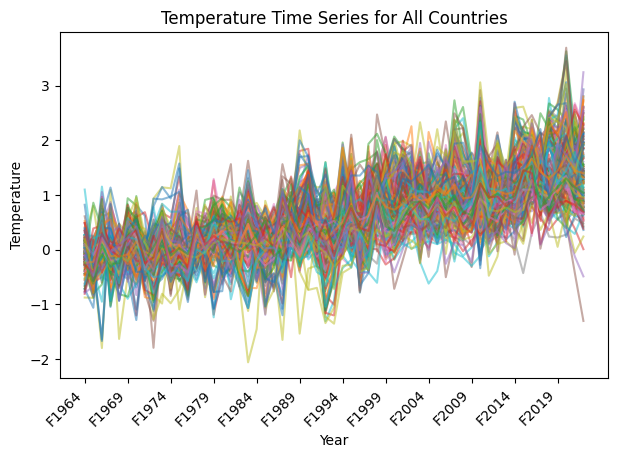

In [16]:
# Time Series Plot
# Set 'Country' and 'ISO3' as the index for time-series analysis
df_temp_1 = df_temp
df_temp_1.set_index(['Country', 'ISO3'], inplace=True)

# Transpose the DataFrame
df_temp_1_transposed = df_temp_1.iloc[:, 3:].T

# Plot the time series for each country
plt.figure(figsize=(100, 8))
ax = df_temp_1_transposed.plot(legend=False, alpha=0.5)

# Set x-axis ticks every 5 years
years = df_temp_1_transposed.index[::5]
ax.set_xticks(range(0, len(df_temp_1_transposed.index), 5))
ax.set_xticklabels(years, rotation=45, ha="right")  # Rotate labels by 45 degrees

plt.title('Temperature Time Series for All Countries')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.tight_layout(pad=1.5)  # Adjust pad for spacing
plt.show()

In [17]:
# At first glance, it is clear that temperature change over the years has been increasing almost all over the world.

<Figure size 2000x800 with 0 Axes>

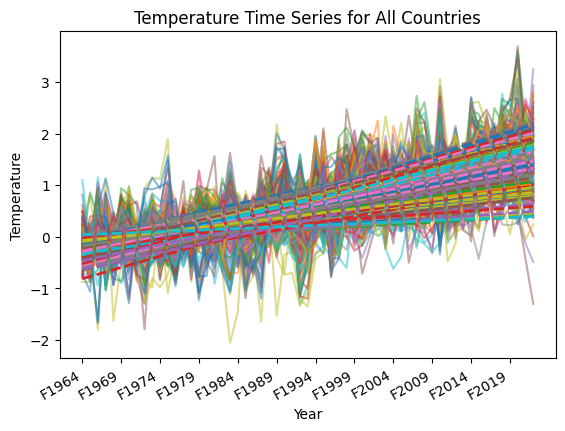

In [18]:
# Time series plot 2
# Set 'Country' and 'ISO3' as the index for time-series analysis
df_temp_2 = df_temp

# Transpose the DataFrame
df_temp_2_transposed = df_temp_2.iloc[:, 3:].T

# Plot the time series for each country
plt.figure(figsize=(20, 8))
ax = df_temp_2_transposed.plot(legend=False, alpha=0.5)

# Set x-axis ticks every 5 years
years = df_temp_2_transposed.index[::5]
ax.set_xticks(range(0, len(df_temp_2_transposed.index), 5))
ax.set_xticklabels(years, rotation=45, ha="right")  # Rotate labels by 45 degrees

plt.title('Temperature Time Series for All Countries')
plt.xlabel('Year')
plt.ylabel('Temperature')

# Use autofmt_xdate to automatically adjust date labels
plt.gcf().autofmt_xdate()

# Fit linear regression to each time series and plot the trend line
for country in df_temp_2_transposed.columns:
    x = np.arange(len(df_temp_2_transposed.index))
    y = df_temp_2_transposed[country].values
    slope, intercept, _, _, _ = linregress(x, y)
    trend_line = slope * x + intercept
    ax.plot(df_temp_2_transposed.index, trend_line, label=f'Trend - {country}', linestyle='--', linewidth=2)

# plt.legend()
plt.show()


In [19]:
# Bar chart:

df_temp.reset_index(inplace=True)

df_temp.columns = [col.replace('F', '') if col.startswith('F') else col for col in df_temp.columns]

country_dropdown = widgets.Dropdown(
    options=df_temp['Country'].unique(),
    value=df_temp['Country'].unique()[0],
    description='Select Country:'
)

# Create an output widget for displaying the chart
output = widgets.Output()

# Function to update the chart based on the selected country
def update_chart(change):
    selected_country = change.new
    country_data = df_temp[df_temp['Country'] == selected_country]
    
    with output:
        output.clear_output(wait=True)
        years = df_temp.columns[2:]
        plt.figure(figsize=(15, 6))      
        # plt.bar(years, country_data.iloc[0, 2:], color='skyblue')
        # Bar chart with blue for negative values and red for positive values
        colors = ['blue' if val < 0 else 'red' if np.isfinite(val) else 'gray' for val in country_data.iloc[0, 2:]]
        bars = plt.bar(years, country_data.iloc[0, 2:], color=colors)     
        plt.title(f'Temperature Change in {selected_country} (Base: 1951-1980)')
        plt.xlabel('Year')
        plt.ylabel('Temperature Change (°C)')
        plt.xticks(rotation=45, ha='right')
        plt.xticks(years[::4])  # Show every 4 years
        plt.show()


# Attach the update_chart function to the dropdown's observe event
country_dropdown.observe(update_chart, names='value')

# Display the dropdown and the output
display(country_dropdown)
display(output)

Dropdown(description='Select Country:', options=('Afghanistan, Islamic Rep. of', 'Albania', 'Algeria', 'Americ…

Output()

In [20]:
# Blue bars indicate cooler-than-average years; red bars show warmer-than-average years
# Interestingly, we see that the temperature change until 1976 also has negative values, that is, the weather has become colder.
# But after 1977 it is clear that temperature change has always been positive.

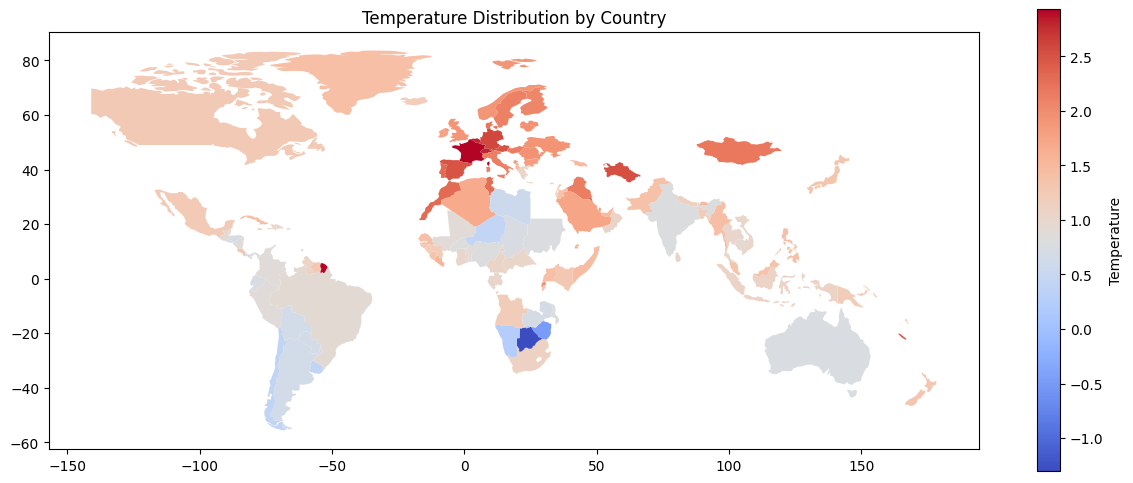

In [21]:
# Visualize geographical data on maps using Geopandas

# Load the world map dataset from Geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged_data = world.merge(df_temp, left_on='name', right_on='Country', how='inner')

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(merged_data)

# Plot the data
gdf.plot(column='2022', legend=True, figsize=(15, 10), cmap='coolwarm', legend_kwds={'label': "Temperature", 'shrink': 0.6})
plt.title('Temperature Distribution by Country')
plt.show()


In [22]:
# Interactime map: 

# Load the world map dataset from Geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged_data = world.merge(df_temp, left_on='name', right_on='Country', how='inner')

# Convert the temperature column to numeric
merged_data['2022'] = pd.to_numeric(merged_data['2022'], errors='coerce')

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(merged_data)

# Create a folium map centered around the mean coordinates of the data
map_center = [gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()]
mymap = folium.Map(location=map_center, zoom_start=2)

# Add GeoJSON data and choropleth layer
folium.GeoJson(gdf, name='geojson').add_to(mymap)
folium.Choropleth(
    geo_data=gdf,
    data=gdf,
    columns=['name', '2022'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Temperature',
).add_to(mymap)

# Add tooltips with country names
for idx, row in gdf.iterrows():
    folium.Marker([row.geometry.centroid.y, row.geometry.centroid.x], tooltip=row['name']).add_to(mymap)

# Display the map directly in the notebook
display(mymap)


In [23]:
# Based on this dataset France, Switzerland, Italy, Spain, Guyane, Turkmenistane had the most increasing Temperatures in year 2022

## Part 2: change in sea level

In [24]:
# Load the data
df_sea = pd.read_csv('/Users/moni/DS - Karan/Week2/Data/Change_in_Mean_Sea_Levels.csv')
df_sea

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,Measure,Date,Value
0,1,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Andaman Sea,D12/17/1992,-10.34
1,2,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Arabian Sea,D12/17/1992,-18.46
2,3,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Atlantic Ocean,D12/17/1992,-15.41
3,4,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Baltic Sea,D12/17/1992,196.85
4,5,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Bay Bengal,D12/17/1992,3.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35599,35600,World,NaN,WLD,Change in mean sea level: Sea level: Trend,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",South China,D11/08/2022,3.76
35600,35601,World,NaN,WLD,Change in mean sea level: Sea level: Trend,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Southern Ocean,D11/08/2022,3.22
35601,35602,World,NaN,WLD,Change in mean sea level: Sea level: Trend,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Tropics,D11/08/2022,3.11
35602,35603,World,NaN,WLD,Change in mean sea level: Sea level: Trend,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",World,D11/08/2022,3.07


In [25]:
# delete unnecessary columns
df_sea=df_sea[['Measure', 'Date', 'Value']]
df_sea

,Measure,Date,Value
0,Andaman Sea,D12/17/1992,-10.34
1,Arabian Sea,D12/17/1992,-18.46
2,Atlantic Ocean,D12/17/1992,-15.41
3,Baltic Sea,D12/17/1992,196.85
4,Bay Bengal,D12/17/1992,3.27
...,...,...,...
35599,South China,D11/08/2022,3.76
35600,Southern Ocean,D11/08/2022,3.22
35601,Tropics,D11/08/2022,3.11
35602,World,D11/08/2022,3.07


In [26]:
# Display basic information about the dataset
print(df_sea.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35604 entries, 0 to 35603
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Measure  35604 non-null  object 
 1   Date     35604 non-null  object 
 2   Value    35604 non-null  float64
dtypes: float64(1), object(2)
memory usage: 834.6+ KB
None


In [27]:
# Change the date column from object to date
df_sea['Date'] = pd.to_datetime(df_sea['Date'], format='D%m/%d/%Y')

# Now 'Date' column is in datetime format
print(df_sea.head())

          Measure       Date   Value
0     Andaman Sea 1992-12-17  -10.34
1     Arabian Sea 1992-12-17  -18.46
2  Atlantic Ocean 1992-12-17  -15.41
3      Baltic Sea 1992-12-17  196.85
4      Bay Bengal 1992-12-17    3.27


In [28]:
# Summary statistics
print(df_sea.describe())

                                Date         Value
count                          35604  35604.000000
mean   2008-05-30 16:08:24.752275200     25.983479
min              1992-12-17 00:00:00   -401.850000
25%              2002-10-03 18:00:00     -8.552500
50%              2009-01-02 00:00:00     23.095000
75%              2014-06-18 00:00:00     58.480000
max              2022-11-08 00:00:00    504.950000
std                              NaN     62.781917


In [29]:
# Finding missing values
df_sea.isnull().sum()

Measure    0
Date       0
Value      0
dtype: int64

In [30]:
# There is not any missing values in this dataset

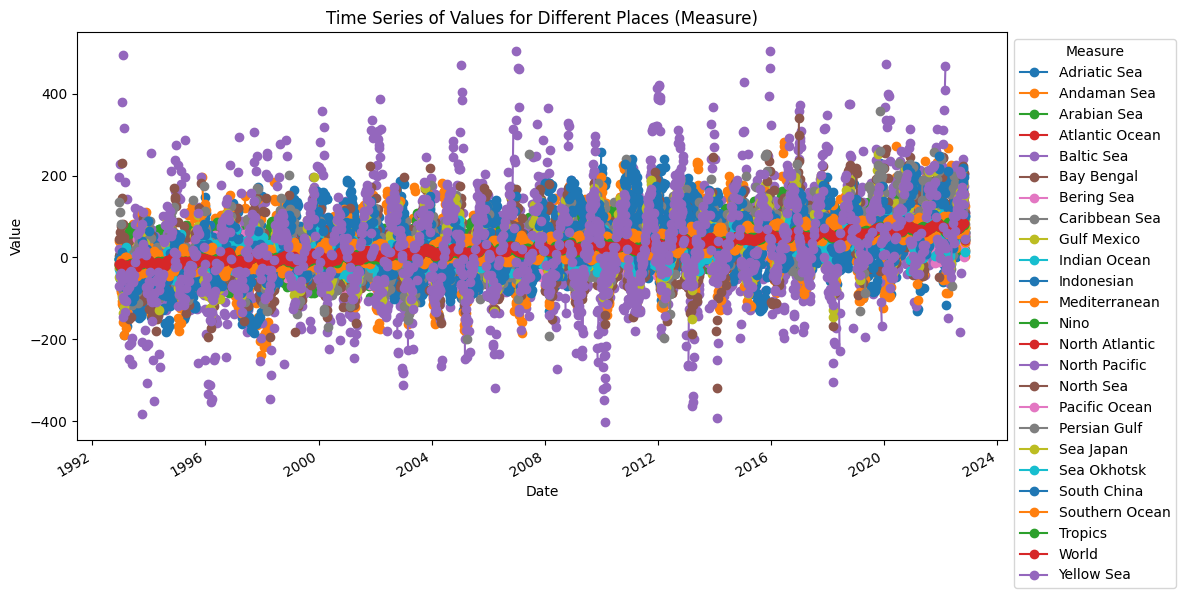

In [31]:
# Aggregate duplicate entries (mean value for each combination of 'Date' and 'Measure')
df_sea_pivot = df_sea.groupby(['Date', 'Measure']).mean().unstack()

# Plot the time series
plt.figure(figsize=(12, 6))
df_sea_pivot['Value'].plot(marker='o', linestyle='-', ax=plt.gca())
plt.title('Time Series of Values for Different Places (Measure)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Measure', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [32]:
# As we see,the read dots show the data related to world during different years and it is increasing.

In [33]:
# Trend in Mean Sea Levels

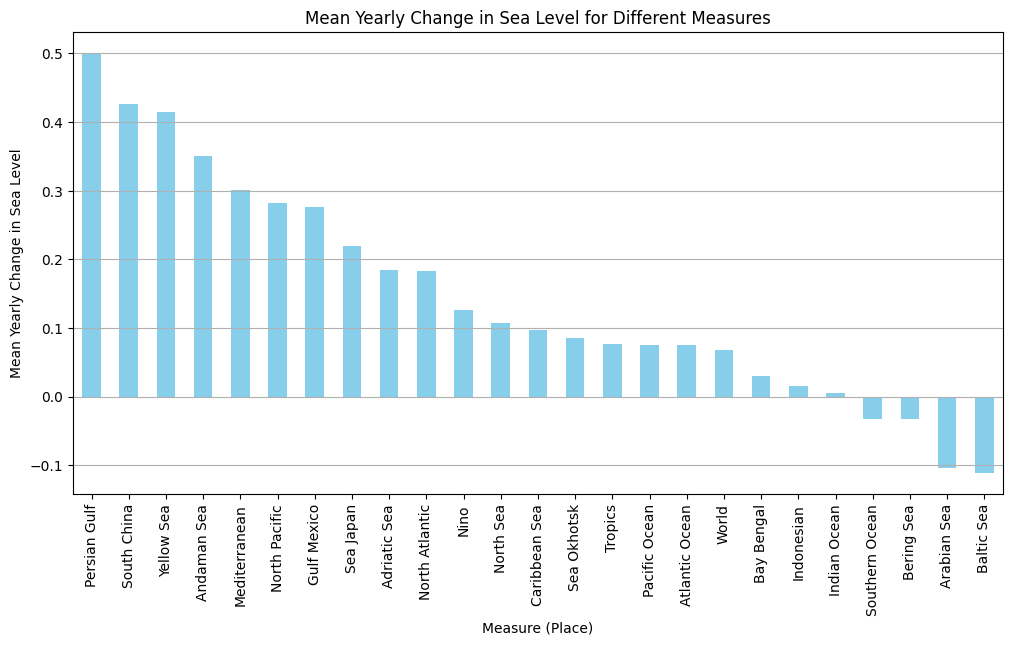

In [34]:
df_sea_2 = df_sea.copy()
df_sea_2['Year'] = df_sea_2['Date'].dt.year

# Calculate yearly change in sea level
df_sea_2['Yearly_Change'] = df_sea_2.groupby(['Measure', 'Year'])['Value'].diff()

# Calculate mean yearly change for each measure
mean_yearly_change = df_sea_2.groupby('Measure')['Yearly_Change'].mean()
mean_yearly_change = mean_yearly_change.sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
mean_yearly_change.plot(kind='bar', color='skyblue')
plt.title('Mean Yearly Change in Sea Level for Different Measures')
plt.xlabel('Measure (Place)')
plt.ylabel('Mean Yearly Change in Sea Level')
plt.grid(axis='y')

plt.show()

## part 3: Co2 Concentration analysis

In [35]:
# Load the data
df_co2 = pd.read_csv('/Users/moni/DS - Karan/Week2/Data/Atmospheric_CO%E2%82%82_Concentrations.csv')
df_co2

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,Date,Value
0,1,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M03,315.70
1,2,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M04,317.45
2,3,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M05,317.51
3,4,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M06,317.24
4,5,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M07,315.86
...,...,...,...,...,...,...,...,...,...,...,...,...
1561,1562,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",2023M09,0.63
1562,1563,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",2023M10,418.82
1563,1564,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",2023M10,0.74
1564,1565,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",2023M11,420.46


In [36]:
# Delete unnecessary columns -  first find out which unique values we have

In [37]:
country = df_co2['Country'].unique()
print(country)

['World']


In [38]:
Unit = df_co2['Unit'].unique()
print(Unit)

['Parts Per Million' 'Percent']


In [39]:
count_ppm = (df_co2['Unit'] == 'Parts Per Million').sum()
count_percent = (df_co2['Unit'] == 'Percent').sum()
print('count_ppm: ' + str(count_ppm))
print('count_percent: ' + str(count_percent))

count_ppm: 789
count_percent: 777


In [40]:
# As we must have data related to just one unit, we delete the rows with percent unit and go ahead with parts per million.

In [41]:
# Create a boolean mask for rows where the value in 'Unit' is equal to 'Parts Per Million'
mask = df_co2['Unit'] == 'Parts Per Million'

# Use the boolean mask to filter the DataFrame
filtered_df_co2 = df_co2[mask]
filtered_df_co2

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,Date,Value
0,1,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M03,315.70
1,2,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M04,317.45
2,3,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M05,317.51
3,4,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M06,317.24
4,5,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M07,315.86
...,...,...,...,...,...,...,...,...,...,...,...,...
1556,1557,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",2023M07,421.83
1558,1559,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",2023M08,419.68
1560,1561,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",2023M09,418.51
1562,1563,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",2023M10,418.82


In [42]:
# now delete unnecessary colums
df_co2=filtered_df_co2[['Date', 'Value']]
df_co2

,Date,Value
0,1958M03,315.70
1,1958M04,317.45
2,1958M05,317.51
3,1958M06,317.24
4,1958M07,315.86
...,...,...
1556,2023M07,421.83
1558,2023M08,419.68
1560,2023M09,418.51
1562,2023M10,418.82


In [43]:
# Change the date format
df_co2['Date'] = pd.to_datetime(df_co2['Date'], format='%YM%m')

In [44]:
df_co2

,Date,Value
0,1958-03-01,315.70
1,1958-04-01,317.45
2,1958-05-01,317.51
3,1958-06-01,317.24
4,1958-07-01,315.86
...,...,...
1556,2023-07-01,421.83
1558,2023-08-01,419.68
1560,2023-09-01,418.51
1562,2023-10-01,418.82


In [45]:
# Finding missing values
df_co2.isnull().sum()

Date     0
Value    0
dtype: int64

In [46]:
# There is not any missing values

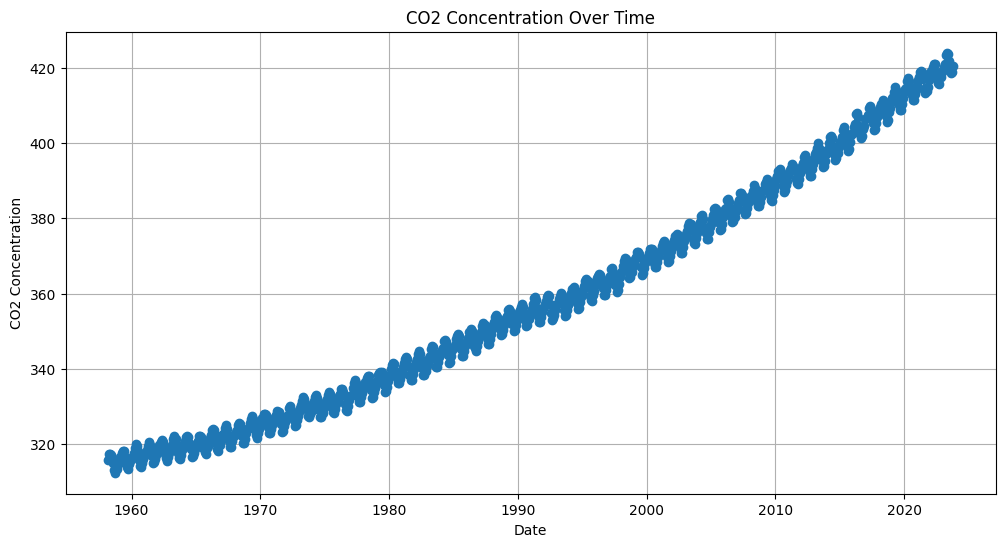

In [47]:
# Set 'Date' as the index
df_co2.set_index('Date', inplace=True)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df_co2.index, df_co2['Value'], marker='o', linestyle='-')
plt.title('CO2 Concentration Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Concentration')
plt.grid(True)
plt.show()

In [48]:
# And as we see the CO2 Concentration in the World is increasing during the years

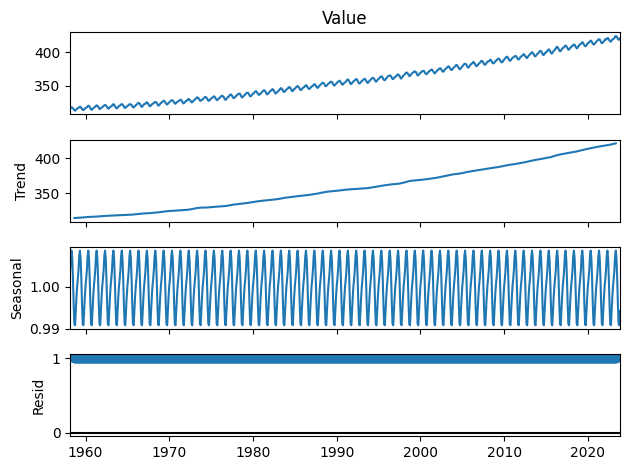

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(df_co2['Value'], model='multiplicative', period=12)  # Assuming a yearly seasonality

# Plot the components
result.plot()
plt.show()

In [50]:
# Seasonal decomposition is a technique used in time series analysis to break down a time series into its fundamental components: 
# trend, seasonality, and residuals. This decomposition helps in understanding and analyzing the patterns and fluctuations within 
# the time series data. Here's what each component represents:
# Trend:
# The overall long-term movement or direction in the data. It represents the underlying pattern that may show an increasing or 
# decreasing trend over time.
# Seasonality:
# The repetitive and predictable patterns that occur at regular intervals within the time series. Seasonality often follows a 
# specific time frame, such as daily, monthly, or yearly patterns. It helps in identifying periodic fluctuations in the data.
# Residuals (Irregular or Noise):
# The remaining random fluctuations or noise in the data that cannot be explained by the trend or seasonality. 
# Residuals represent the unexplained variability in the time series.
# The goal of seasonal decomposition is to isolate and analyze each of these components separately, providing a clearer understanding of the underlying structure of the time series. This can be particularly useful for making predictions or identifying anomalies.

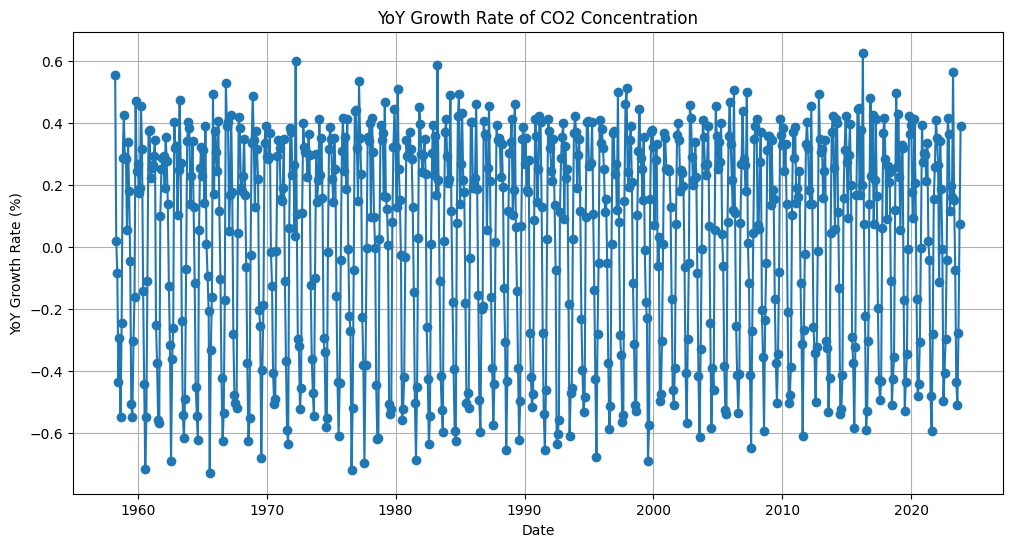

In [51]:
# year to year differences analysis
# Calculate YoY growth rate
df_co2['YoY_Growth_Rate'] = df_co2['Value'].pct_change(periods=1) * 100

# Plot the YoY growth rate
plt.figure(figsize=(12, 6))
plt.plot(df_co2.index, df_co2['YoY_Growth_Rate'], marker='o', linestyle='-')
plt.title('YoY Growth Rate of CO2 Concentration')
plt.xlabel('Date')
plt.ylabel('YoY Growth Rate (%)')
plt.grid(True)
plt.show()


## Part4: Climate related disaster frequency

In [52]:
# Load the data
df_disaster = pd.read_csv('/Users/moni/DS - Karan/Week2/Data/Climate-related_Disasters_Frequency.csv')
df_disaster

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN
1,2,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,4.0,2.0,1.0,4.0,1.0,3.0,6.0,5.0,2.0,5.0
3,4,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,1.0,NaN,4.0,NaN,2.0,1.0,1.0,1.0,1.0,1.0
4,5,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,NaN,1.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,966,Zambia,ZM,ZMB,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,1.0,1.0,NaN,NaN,NaN,NaN,2.0,3.0,1.0,1.0
966,967,Zimbabwe,ZW,ZWE,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN
967,968,Zimbabwe,ZW,ZWE,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,1.0,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
968,969,Zimbabwe,ZW,ZWE,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,1.0


In [53]:
df_disaster.columns

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'F1980', 'F1981',
       'F1982', 'F1983', 'F1984', 'F1985', 'F1986', 'F1987', 'F1988', 'F1989',
       'F1990', 'F1991', 'F1992', 'F1993', 'F1994', 'F1995', 'F1996', 'F1997',
       'F1998', 'F1999', 'F2000', 'F2001', 'F2002', 'F2003', 'F2004', 'F2005',
       'F2006', 'F2007', 'F2008', 'F2009', 'F2010', 'F2011', 'F2012', 'F2013',
       'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020', 'F2021',
       'F2022'],
      dtype='object')

In [54]:
# Just some investigations
unique_values_column1 = df_disaster['Indicator'].unique()
unique_values_column2 = df_disaster['Unit'].unique()
unique_values_column3 = df_disaster['CTS_Full_Descriptor'].unique()

# Print the unique values
print("Unique values in Column1:", unique_values_column1)
print("Unique values in Column2:", unique_values_column2)
print("Unique values in Column3:", unique_values_column3)

Unique values in Column1: ['Climate related disasters frequency, Number of Disasters: Drought'
 'Climate related disasters frequency, Number of Disasters: Extreme temperature'
 'Climate related disasters frequency, Number of Disasters: Flood'
 'Climate related disasters frequency, Number of Disasters: Landslide'
 'Climate related disasters frequency, Number of Disasters: Storm'
 'Climate related disasters frequency, Number of Disasters: TOTAL'
 'Climate related disasters frequency, Number of Disasters: Wildfire']
Unique values in Column2: ['Number of']
Unique values in Column3: ['Environment, Climate Change, Climate Indicators, Climate Related Disasters Frequency']


In [55]:
# Now delete unnecessary colums
df_disaster=df_disaster[['Country', 'ISO3', 'Indicator','F1980', 'F1981',
       'F1982', 'F1983', 'F1984', 'F1985', 'F1986', 'F1987', 'F1988', 'F1989',
       'F1990', 'F1991', 'F1992', 'F1993', 'F1994', 'F1995', 'F1996', 'F1997',
       'F1998', 'F1999', 'F2000', 'F2001', 'F2002', 'F2003', 'F2004', 'F2005',
       'F2006', 'F2007', 'F2008', 'F2009', 'F2010', 'F2011', 'F2012', 'F2013',
       'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020', 'F2021',
       'F2022']]
df_disaster.head()

,Country,ISO3,Indicator,F1980,F1981,F1982,F1983,F1984,F1985,F1986,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,"Afghanistan, Islamic Rep. of",AFG,"Climate related disasters frequency, Number of...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN
1,"Afghanistan, Islamic Rep. of",AFG,"Climate related disasters frequency, Number of...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Afghanistan, Islamic Rep. of",AFG,"Climate related disasters frequency, Number of...",1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,2.0,1.0,4.0,1.0,3.0,6.0,5.0,2.0,5.0
3,"Afghanistan, Islamic Rep. of",AFG,"Climate related disasters frequency, Number of...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,4.0,NaN,2.0,1.0,1.0,1.0,1.0,1.0
4,"Afghanistan, Islamic Rep. of",AFG,"Climate related disasters frequency, Number of...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN


In [56]:
# Replace NAN Values with Zero
df_disaster = df_disaster.fillna(0)

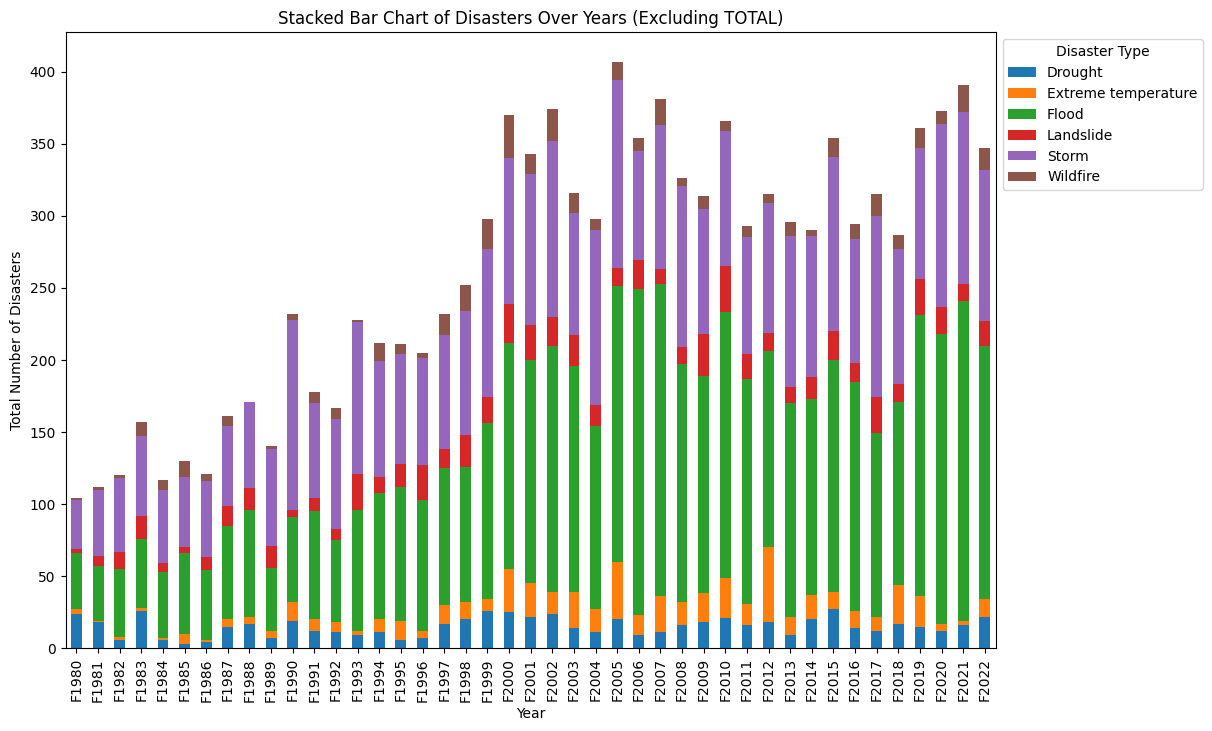

In [57]:
# Visualization
# Exclude the specific disaster type
df_filtered = df_disaster[df_disaster['Indicator'] != 'Climate related disasters frequency, Number of Disasters: TOTAL']

# Select columns for years and types of disasters
years = df_filtered.columns[3:]  # Assuming columns from 'F1980' to 'F2022'
disaster_types = df_filtered['Indicator'].unique()

# Group by disaster type and sum values for each year
grouped_data = df_filtered.groupby('Indicator')[years].sum()

# Shorten legend labels
shortened_labels = [indicator.split(': ')[-1] for indicator in disaster_types]

# Plot the stacked bar chart with shortened legend labels
ax = grouped_data.T.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Stacked Bar Chart of Disasters Over Years (Excluding TOTAL)')
plt.xlabel('Year')
plt.ylabel('Total Number of Disasters')
plt.legend(title='Disaster Type', labels=shortened_labels, bbox_to_anchor=(1, 1), loc='upper left')
plt.show()



In [58]:
# As we see the total number of disasters asre incresed during the years and we had the most in 2005, then 2021

## Part 5: Ice sheets melting

## Finding the correlation

In [ ]:
# Read the world temperature data from df_temp
df_world_temp = df_temp[df_temp['Country'] == 'World']

df_world_temp = df_world_temp.drop(['ISO3', 'Country'], axis=1)

# Reset the index to make the existing index a column
df_world_temp_reset = df_world_temp.reset_index()

# Use the melt function to reshape the DataFrame
df_world_temp_melted = pd.melt(df_world_temp_reset, id_vars='index', var_name='Date', value_name='Value')
df_world_temp_melted = df_world_temp_melted.drop(['index'], axis=1)



df_world_temp_melted


In [ ]:
# df_co2 = df_co2.drop(['level_0', 'index', 'YoY_Growth_Rate'], axis=1)

# Extract the year from the 'Date' column
df_co2.reset_index(inplace=True)
df_co2['Year'] = df_co2['Date'].dt.year

# Group by the 'Year' column and calculate the average for each group
df_co2_grouped = df_co2.groupby('Year').agg({'Value': 'mean'}).reset_index()

df_co2_grouped = df_co2_grouped[(df_co2_grouped['Year'] != 1958) & (df_co2_grouped['Year'] != 1959) & (df_co2_grouped['Year'] != 1960) & (df_co2_grouped['Year'] != 2023)]


df_co2_grouped

In [ ]:
df_world_temp_melted['Date'] = pd.to_datetime(df_world_temp_melted['Date'])

# Merge the datasets based on the 'Year' column
df_merged = pd.merge(df_world_temp_melted, df_co2_grouped, how='inner', left_on=df_world_temp_melted['Date'].dt.year, right_on='Year')

# Set the style for the plot
sns.set(style="whitegrid")

# Create a scatter plot using seaborn with additional characteristics
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Value_x', y='Value_y', data=df_merged, hue='Year', palette='viridis', size='Value_y',
                sizes=(20, 200), alpha=0.7)

# Set labels and title
plt.title('Temperature vs CO2 Concentration with Year and CO2 Size', fontsize=16)
plt.xlabel('Temperature', fontsize=14)
plt.ylabel('CO2 Concentration', fontsize=14)

# Add legend
plt.legend(title='Year')

# Show the plot
plt.show()


In [ ]:
# We can see the Positive Correlation between 2 factors

In [ ]:
# The spiral dynamic plot

# Convert 'Date' to datetime objects
df_world_temp_melted['Date'] = pd.to_datetime(df_world_temp_melted['Date'], format='%Y')

# Sort the DataFrame by 'Date'
df_world_temp_melted.sort_values(by='Date', inplace=True)

# Create a polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

# Function to update the climate spiral plot
def update(frame):
    ax.clear()
    
    theta = np.linspace(0.5 * np.pi, (0.5 + frame / (len(df_world_temp_melted)-1)) * 10.5 * np.pi, len(df_world_temp_melted))
    r = df_world_temp_melted['Value'][:frame].values  # Convert to numpy array

    # Ensure the arrays have the same dimensions
    if len(r) < len(theta):
        theta = theta[:len(r)]

    # Set a default color for the entire line
    line_color = 'blue'

    ax.plot(theta, r, color=line_color, linewidth=2)

    ax.set_theta_direction(-1)
    ax.set_theta_offset(np.pi / 2.0)
    ax.set_rlabel_position(180)
    ax.grid(True)
    ax.set_xticks([])  # Hide radial ticks


    plt.title(f'Climate Spiral Plot - World Temperature Change (Year: {df_world_temp_melted["Date"].iloc[frame].strftime("%Y")})')

    # Update line color only if the array is not empty
    if len(r) > 0:
        for line in ax.lines:
            line.set_color('red' if r[-1] > 0 else 'blue')

# Create the animation
animation = FuncAnimation(fig, update, frames=len(df_world_temp_melted), interval=200, repeat=False)

# Save the animation as a video file (use a different extension such as .avi or .gif)
animation.save('/Users/moni/DS - Karan/climate_spiral_animation.gif', writer='pillow', dpi=300)  # Use a different extension

plt.close()
# Display the video using HTML5 video tag
from IPython.display import HTML
#HTML(f'<img src="climate_spiral_animation.gif" alt="Climate Spiral Plot - World Temperature Change" width="800">')
# to show the chart in Github I had to save it as gif and load it via markdown

![Climate Spiral Animation](climate_spiral_animation.gif)